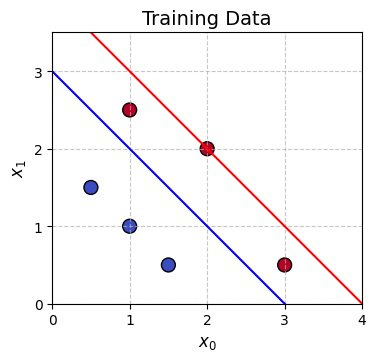

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


In [ ]:
# Cost of logistic loss function
# This script defines the logistic loss function and plots it for both classes (y_true = 1 and y_true = 0).
import numpy as np
import matplotlib.pyplot as plt

def compute_model(X, weights, bias):
    """
    Compute the linear model output.
    This function computes the dot product of input features and weights, adds bias, and applies the sigmoid function.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        Input features.
    weights : array-like, shape (n_features,)
        Model weights.
    bias : float
        Model bias term.
        
    Returns:
    array-like
        The output of the model after applying the sigmoid function.
    """
    z = np.dot(X, weights) + bias
    return 1 / (1 + np.exp(-z))


def compute_cost_logistic(X, Y, W, b):
    """
    Compute the logistic loss for a given set of predictions and true labels.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        Input features.
    Y : array-like, shape (n_samples,)
        True labels (0 or 1).
    W : array-like, shape (n_features,)
        Model weights.
    b : float
        Model bias term.
        
    Returns:
    float
        The computed logistic loss.
    """
    y_pred = compute_model(X, W, b)
    # Avoid log(0) by clipping predictions
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    # Calculate the logistic loss
    loss = -np.mean(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))    
    return loss5

def plot_data(X, y):
    fig, ax = plt.subplots(1,1,figsize=(4,4))
    # Set both axes to be from 0-4
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
    ax.set_title('Training Data', fontsize=14)
    ax.set_xticks(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, 4, 1))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_aspect('equal', adjustable='box')
    ax.set_ylabel('$x_1$', fontsize=12)
    ax.set_xlabel('$x_0$', fontsize=12)
    ax.set_title('Training Data', fontsize=14)
    ax.set_xticks(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, 4, 1))
    ax.axis([0, 4, 0, 3.5])
    # Choose values between 0 and 6
    x0 = np.arange(0,6)

    # Plot the two decision boundaries
    x1 = 3 - x0
    x1_other = 4 - x0

    # Plot the decision boundary
    ax.plot(x0,x1, c='blue', label="$b$=-3")
    ax.plot(x0,x1_other, c='red', label="$b$=-4")
    plt.show()


if __name__ == "__main__": 
    # Generate predicted probabilities
    X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
    y_train = np.array([0, 0, 0, 1, 1, 1]) 
    w_tmp = np.array([1,1])
    b_tmp = [-3, -4]  # Two different bias values for comparison
    y_pred = np.linspace(0.01, 0.99, 100)  # Avoiding 0 and 1 to prevent log(0)
    # Calculate losses for y_true = 1 and y_true = 0
    plot_data(X_train, y_train)
    # Plot the logistic loss
    print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_tmp, b_tmp[0]))
    print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_tmp, b_tmp[1]))
    